# National Health and Nutrition Examination Survey
- 2005-2006 Data Documentation, Codebook, and Frequencies

## 1. Cholesterol - Total (TCHOL_D)
- Data File: TCHOL_D.xpt
-https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/TCHOL_D.htm#SEQN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# open
tc= pd.read_sas('resources/TCHOL_D.XPT')
tc.head()

,SEQN,LBXTC,LBDTCSI
0,31128.0,129.0,3.34
1,31129.0,170.0,4.40
2,31130.0,NaN,NaN
3,31131.0,105.0,2.72
4,31132.0,147.0,3.80


In [3]:
# length of the df
len(tc)

8086

In [4]:
# cols in the df
tc.columns

Index(['SEQN', 'LBXTC', 'LBDTCSI'], dtype='object')

In [5]:
# rename
tc = tc.rename(columns={
       'SEQN':'Respondent sequence number',
       'LBXTC':'Total cholesterol (mg/dL)'
})
tc.head()

,Respondent sequence number,Total cholesterol (mg/dL),LBDTCSI
0,31128.0,129.0,3.34
1,31129.0,170.0,4.40
2,31130.0,NaN,NaN
3,31131.0,105.0,2.72
4,31132.0,147.0,3.80


In [6]:
# drop the col.
tc1 = tc.drop(['LBDTCSI'], axis=1)
tc1.head()

,Respondent sequence number,Total cholesterol (mg/dL)
0,31128.0,129.0
1,31129.0,170.0
2,31130.0,NaN
3,31131.0,105.0
4,31132.0,147.0


In [7]:
# value_counts() the total cholesterol
count_tc = tc1['Total cholesterol (mg/dL)'].value_counts()
count_tc

163.0    94
162.0    88
168.0    86
174.0    84
166.0    83
         ..
90.0      1
366.0     1
337.0     1
309.0     1
78.0      1
Name: Total cholesterol (mg/dL), Length: 266, dtype: int64

In [8]:
# summary stat
tc1['Total cholesterol (mg/dL)'].describe()

count    7360.000000
mean      184.471060
std        42.844203
min        78.000000
25%       155.000000
50%       179.000000
75%       209.000000
max       615.000000
Name: Total cholesterol (mg/dL), dtype: float64

<AxesSubplot:xlabel='Total cholesterol (mg/dL)', ylabel='Count'>

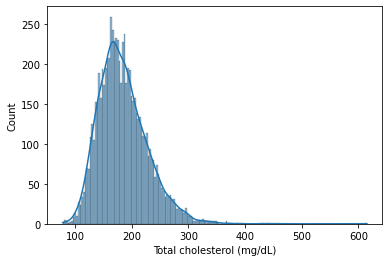

In [9]:
# histogram
sns.histplot(tc1['Total cholesterol (mg/dL)'],
             bins=100, element='bars', binwidth=3, kde=True)

---
## 2. Cholesterol - HDL (HDL_D)
- Data File: HDL_D.xpt
- https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/HDL_D.htm

In [10]:
# open
hdl = pd.read_sas('resources/HDL_D.XPT')
hdl.head()

,SEQN,LBDHDD,LBDHDDSI
0,31128.0,55.0,1.42
1,31129.0,46.0,1.19
2,31130.0,NaN,NaN
3,31131.0,39.0,1.01
4,31132.0,59.0,1.53


In [11]:
# length of df
len(hdl)

8086

In [12]:
# rename cols.
hdl = hdl.rename(columns={
       'SEQN':'Respondent sequence number',
       'LBDHDD':'Direct HDL-Cholesterol (mg/dL)'
})
hdl.head()

,Respondent sequence number,Direct HDL-Cholesterol (mg/dL),LBDHDDSI
0,31128.0,55.0,1.42
1,31129.0,46.0,1.19
2,31130.0,NaN,NaN
3,31131.0,39.0,1.01
4,31132.0,59.0,1.53


In [13]:
# drop a col
hdl = hdl.drop(['LBDHDDSI'], axis=1)
hdl.head()

,Respondent sequence number,Direct HDL-Cholesterol (mg/dL)
0,31128.0,55.0
1,31129.0,46.0
2,31130.0,NaN
3,31131.0,39.0
4,31132.0,59.0


In [14]:
# summary stat
hdl['Direct HDL-Cholesterol (mg/dL)'].describe()

count    7360.000000
mean       54.781929
std        15.476290
min        15.000000
25%        43.000000
50%        52.000000
75%        63.000000
max       188.000000
Name: Direct HDL-Cholesterol (mg/dL), dtype: float64

<AxesSubplot:xlabel='Direct HDL-Cholesterol (mg/dL)', ylabel='Count'>

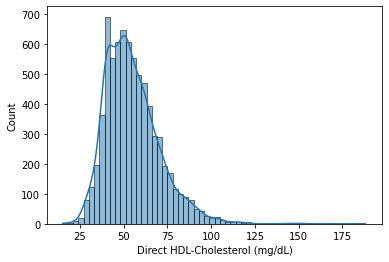

In [15]:
# histogram
sns.histplot(hdl['Direct HDL-Cholesterol (mg/dL)'],
             bins=100, element='bars', binwidth=3, kde=True)

---
### merge totol cholesterol with hdl

In [16]:
# merge
exam_df = tc1.merge(hdl, on='Respondent sequence number')
exam_df.head()

,Respondent sequence number,Total cholesterol (mg/dL),Direct HDL-Cholesterol (mg/dL)
0,31128.0,129.0,55.0
1,31129.0,170.0,46.0
2,31130.0,NaN,NaN
3,31131.0,105.0,39.0
4,31132.0,147.0,59.0


In [17]:
# length of the df
len(exam_df)

8086

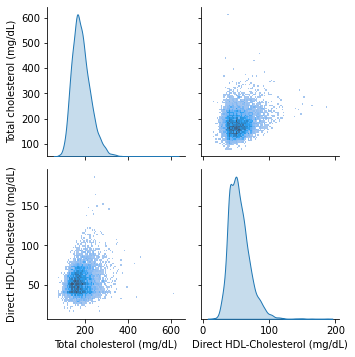

In [18]:
sns.pairplot(exam_df[['Total cholesterol (mg/dL)', 'Direct HDL-Cholesterol (mg/dL)']],
             diag_kind='kde', kind='hist')

- no correlation bet. total cholesterol with hdl?

---
## 3. Cholesterol - LDL, Triglyceride & Apoliprotein (ApoB) (TRIGLY_D)

- Data File: TRIGLY_D.xpt
- https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/TRIGLY_D.htm

In [19]:
# open
ldl = pd.read_sas('resources/TRIGLY_D.XPT')
ldl.head()

,SEQN,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBXAPB,LBDAPBSI
0,31130.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN
1,31131.0,6.755681e+04,86.0,0.971,49.0,1.267,50.0,0.50
2,31132.0,8.019396e+04,65.0,0.734,75.0,1.940,75.0,0.75
3,31133.0,1.566802e+04,61.0,0.689,81.0,2.095,75.0,0.75
4,31134.0,9.339954e+04,195.0,2.202,98.0,2.534,111.0,1.11


In [20]:
# rename
ldl = ldl.rename(columns={
       'SEQN': 'Respondent sequence number',
       'LBXTR': 'Triglyceride (mg/dL)',
       'LBDLDL': 'LDL-cholesterol (mg/dL)',  
       'LBXAPB': 'Apolipoprotein (B) (mg/dL)'
})
ldl.head()

,Respondent sequence number,WTSAF2YR,Triglyceride (mg/dL),LBDTRSI,LDL-cholesterol (mg/dL),LBDLDLSI,Apolipoprotein (B) (mg/dL),LBDAPBSI
0,31130.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN
1,31131.0,6.755681e+04,86.0,0.971,49.0,1.267,50.0,0.50
2,31132.0,8.019396e+04,65.0,0.734,75.0,1.940,75.0,0.75
3,31133.0,1.566802e+04,61.0,0.689,81.0,2.095,75.0,0.75
4,31134.0,9.339954e+04,195.0,2.202,98.0,2.534,111.0,1.11


In [21]:
# drop col
ldl = ldl.drop(ldl[['WTSAF2YR', 'LBDTRSI', 'LBDAPBSI', 'LBDLDLSI']], axis=1)
ldl.head()

,Respondent sequence number,Triglyceride (mg/dL),LDL-cholesterol (mg/dL),Apolipoprotein (B) (mg/dL)
0,31130.0,NaN,NaN,NaN
1,31131.0,86.0,49.0,50.0
2,31132.0,65.0,75.0,75.0
3,31133.0,61.0,81.0,75.0
4,31134.0,195.0,98.0,111.0


In [22]:
# merge
exam_df = exam_df.merge(ldl, on='Respondent sequence number')
exam_df.head()

,Respondent sequence number,Total cholesterol (mg/dL),Direct HDL-Cholesterol (mg/dL),Triglyceride (mg/dL),LDL-cholesterol (mg/dL),Apolipoprotein (B) (mg/dL)
0,31130.0,NaN,NaN,NaN,NaN,NaN
1,31131.0,105.0,39.0,86.0,49.0,50.0
2,31132.0,147.0,59.0,65.0,75.0,75.0
3,31133.0,147.0,54.0,61.0,81.0,75.0
4,31134.0,186.0,49.0,195.0,98.0,111.0


---
## 4. C-Reactive Protein (CRP) (CRP_D)

- Data File: CRP_D.xpt

- https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/CRP_D.htm


In [23]:
crp = pd.read_sas('resources/CRP_D.XPT')
crp.head()

,SEQN,LBXCRP
0,31128.0,0.01
1,31129.0,1.57
2,31130.0,NaN
3,31131.0,2.44
4,31132.0,0.05


In [24]:
len(crp)

9440

In [25]:
crp = crp.rename(columns =
              {'SEQN' : 'Respondent sequence number',
               'LBXCRP' : 'C-reactive protein(mg/dL)'}
)
crp

,Respondent sequence number,C-reactive protein(mg/dL)
0,31128.0,0.01
1,31129.0,1.57
2,31130.0,NaN
3,31131.0,2.44
4,31132.0,0.05
...,...,...
9435,41469.0,0.01
9436,41471.0,0.02
9437,41472.0,0.01
9438,41473.0,0.23


In [26]:
# merge crp into df
exam_df = exam_df.merge(crp, on=['Respondent sequence number'])
exam_df

,Respondent sequence number,Total cholesterol (mg/dL),Direct HDL-Cholesterol (mg/dL),Triglyceride (mg/dL),LDL-cholesterol (mg/dL),Apolipoprotein (B) (mg/dL),C-reactive protein(mg/dL)
0,31130.0,NaN,NaN,NaN,NaN,NaN,NaN
1,31131.0,105.0,39.0,86.0,49.0,50.0,2.44
2,31132.0,147.0,59.0,65.0,75.0,75.0,0.05
3,31133.0,147.0,54.0,61.0,81.0,75.0,0.09
4,31134.0,186.0,49.0,195.0,98.0,111.0,0.21
...,...,...,...,...,...,...,...
3347,41465.0,152.0,40.0,81.0,96.0,84.0,3.13
3348,41467.0,147.0,53.0,69.0,80.0,75.0,0.03
3349,41471.0,142.0,52.0,89.0,72.0,60.0,0.02
3350,41472.0,140.0,30.0,120.0,86.0,91.0,0.01


---
## 5. Glycohemoglobin (GHB_D):  HbA1C

- Data File: GHB_D.xpt

- https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/GHB_D.htm

In [27]:
ghb = pd.read_sas('resources/GHB_D.XPT')
ghb.head()

,SEQN,LBXGH
0,31129.0,5.2
1,31130.0,NaN
2,31131.0,6.0
3,31132.0,7.1
4,31133.0,4.7


In [28]:
len(ghb)

6980

In [29]:
ghb = ghb.rename(columns={
    'SEQN':'Respondent sequence number',
    'LBXGH': 'Glycohemoglobin (%)'
})

ghb.head()

,Respondent sequence number,Glycohemoglobin (%)
0,31129.0,5.2
1,31130.0,NaN
2,31131.0,6.0
3,31132.0,7.1
4,31133.0,4.7


In [30]:
# drop nan
#ghb = ghb.dropna()
len(ghb)

6980

In [31]:
# summary stat
ghb['Glycohemoglobin (%)'].describe()

count    6493.000000
mean        5.423425
std         0.906870
min         3.800000
25%         5.000000
50%         5.300000
75%         5.600000
max        15.600000
Name: Glycohemoglobin (%), dtype: float64

<AxesSubplot:xlabel='Glycohemoglobin (%)', ylabel='Count'>

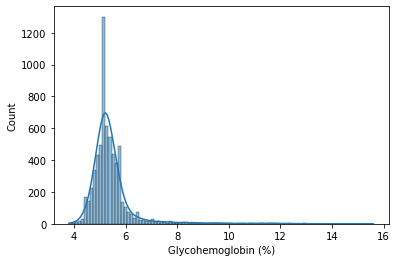

In [32]:
# histo
sns.histplot(ghb['Glycohemoglobin (%)'],bins=100, element='bars', kde=True)

### - det. the diabetic status based on the ghb level

In [33]:
# normal ghb
normal_ghb = ghb.loc[ghb['Glycohemoglobin (%)'] < 5.7]
normal_ghb

,Respondent sequence number,Glycohemoglobin (%)
0,31129.0,5.2
4,31133.0,4.7
9,31143.0,4.7
10,31144.0,4.8
11,31148.0,5.0
...,...,...
6975,41469.0,5.6
6976,41471.0,5.4
6977,41472.0,4.8
6978,41473.0,5.5


In [34]:
# prediabetic ghb - using logical operator &
prediab_ghb = ghb.loc[ (ghb['Glycohemoglobin (%)'] >= 5.7) &
                       (ghb['Glycohemoglobin (%)'] <= 6.4) ] 
prediab_ghb

,Respondent sequence number,Glycohemoglobin (%)
2,31131.0,6.0
5,31134.0,5.9
6,31137.0,5.7
14,31151.0,5.8
17,31154.0,6.1
...,...,...
6955,41440.0,5.8
6965,41458.0,6.0
6967,41460.0,5.7
6970,41464.0,5.7


In [35]:
# diabetic
diab = ghb.loc[ ghb['Glycohemoglobin (%)'] > 6.4 ]
diab

,Respondent sequence number,Glycohemoglobin (%)
3,31132.0,7.1
22,31162.0,7.3
37,31186.0,7.1
41,31192.0,8.7
43,31194.0,9.3
...,...,...
6914,41375.0,7.4
6931,41403.0,9.0
6948,41430.0,9.1
6963,41454.0,8.7


### - add the diabetic status col. to the df

In [36]:
# check the values of the ghb series
x = ghb['Glycohemoglobin (%)'].values
x

array([5.2, nan, 6. , ..., 4.8, 5.5, 5.4])

In [37]:
# find the unique elements of the ghb series
np.unique(x, return_counts=True)

(array([ 3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
         4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,
         6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,
         7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,
         8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,
         9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.3, 10.5,
        10.6, 10.7, 10.8, 10.9, 11. , 11.2, 11.3, 11.5, 11.6, 11.7, 11.8,
        11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.7, 12.8, 12.9, 13.2,
        13.3, 13.4, 13.7, 13.9, 15.6,  nan]),
 array([  3,   2,   8,  12,  19,  31,  70,  96, 144, 225, 340, 431, 496,
        630, 671, 616, 547, 438, 379, 294, 195, 137, 105,  75,  61,  39,
         35,  38,  25,  25,  19,  15,  16,  15,   9,  16,   9,  14,   8,
         10,   9,   6,   6,   6,  10,   4,   8,   6,   4,   8,   4,   7,
          4,   2,   3,   4,   5,   6,   4,   1,   3,   3,   3,   2,   

In [38]:
# def. diabetic status based on the value 
# np.isnan(x) for nan 
condlist = [x<5.7, x>6.4, np.isnan(x)]
choicelist = ['normal', 'diabetic', 'missing']
y = np.select(condlist, choicelist, 'prediabetic')
y


array(['normal', 'missing', 'prediabetic', ..., 'normal', 'normal',
       'normal'], dtype='<U11')

In [39]:
# double check: find the unique elements in the y array 
np.unique(y, return_counts=True)

(array(['diabetic', 'missing', 'normal', 'prediabetic'], dtype='<U11'),
 array([ 394,  487, 5158,  941]))

In [40]:
# add the col to the df
ghb['diabetic status'] = y
ghb

,Respondent sequence number,Glycohemoglobin (%),diabetic status
0,31129.0,5.2,normal
1,31130.0,NaN,missing
2,31131.0,6.0,prediabetic
3,31132.0,7.1,diabetic
4,31133.0,4.7,normal
...,...,...,...
6975,41469.0,5.6,normal
6976,41471.0,5.4,normal
6977,41472.0,4.8,normal
6978,41473.0,5.5,normal


### - generate a summary stat of mean, median, var. std

In [41]:
# mean 
means = ghb.groupby('diabetic status')['Glycohemoglobin (%)'].mean()
means

diabetic status
diabetic       8.158122
missing             NaN
normal         5.127860
prediabetic    5.898512
Name: Glycohemoglobin (%), dtype: float64

In [42]:
# sum. stat
import numpy as np
sum_stat = ghb.groupby('diabetic status')['Glycohemoglobin (%)'].describe()
sum_stat['sem']=sum_stat['std']/np.sqrt(sum_stat['count'])
sum_stat

,count,mean,std,min,25%,50%,75%,max,sem
diabetic status,,,,,,,,,
diabetic,394.0,8.158122,1.741135,6.5,6.8,7.5,8.9,15.6,0.087717
missing,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normal,5158.0,5.127860,0.311354,3.8,4.9,5.2,5.4,5.6,0.004335
prediabetic,941.0,5.898512,0.201689,5.7,5.7,5.8,6.0,6.4,0.006575


### - bar and pie charts

In [43]:
# value count of diabetic status
count = ghb['diabetic status'].value_counts()
count

normal         5158
prediabetic     941
missing         487
diabetic        394
Name: diabetic status, dtype: int64

Text(0, 0.5, 'number of people')

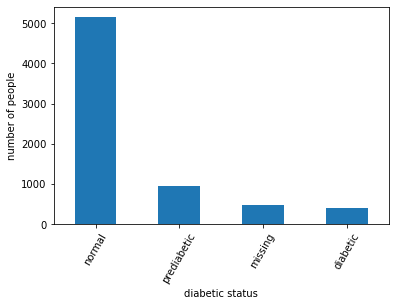

In [44]:
# bar graph of diabetic status count
count.plot(kind='bar')
# f, ax = plt.subplots(figsize=(4,10))
plt.xlabel('diabetic status')
plt.xticks(rotation=60)
plt.ylabel('number of people')
# plt.figure(figsize=(0,6))


<AxesSubplot:ylabel='diabetic status'>

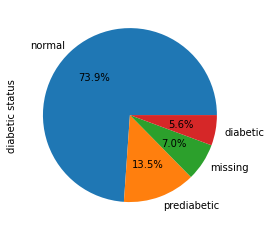

In [45]:
# pie graph of diabetic status count
count.plot(kind='pie', autopct='%1.1f%%')

---
### - merge glocohemoglobin into the exam_df

In [46]:
# merge
exam_df = exam_df.merge(ghb, on='Respondent sequence number')
exam_df.head()

,Respondent sequence number,Total cholesterol (mg/dL),Direct HDL-Cholesterol (mg/dL),Triglyceride (mg/dL),LDL-cholesterol (mg/dL),Apolipoprotein (B) (mg/dL),C-reactive protein(mg/dL),Glycohemoglobin (%),diabetic status
0,31130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing
1,31131.0,105.0,39.0,86.0,49.0,50.0,2.44,6.0,prediabetic
2,31132.0,147.0,59.0,65.0,75.0,75.0,0.05,7.1,diabetic
3,31133.0,147.0,54.0,61.0,81.0,75.0,0.09,4.7,normal
4,31134.0,186.0,49.0,195.0,98.0,111.0,0.21,5.9,prediabetic


---
## 6. Plasma Fasting Glucose & Insulin (GLU_D)

- Data File: GLU_D.xpt
- https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/GLU_D.htm


In [47]:
glu = pd.read_sas('resources/GLU_D.XPT')
glu

,SEQN,WTSAF2YR,LBXGLU,LBDGLUSI,LBXIN,LBDINSI,PHAFSTHR,PHAFSTMN
0,31130.0,5.397605e-79,NaN,NaN,NaN,NaN,10.0,3.0
1,31131.0,6.755681e+04,90.0,4.996,10.03,60.18,14.0,9.0
2,31132.0,8.019396e+04,157.0,8.715,8.99,53.94,11.0,29.0
3,31133.0,1.566802e+04,84.0,4.663,11.27,67.62,12.0,32.0
4,31134.0,9.339954e+04,100.0,5.551,14.51,87.06,14.0,35.0
...,...,...,...,...,...,...,...,...
3347,41465.0,2.185943e+04,101.0,5.607,57.09,342.54,11.0,20.0
3348,41467.0,8.000729e+03,98.0,5.440,14.47,86.82,11.0,23.0
3349,41471.0,1.627432e+04,92.0,5.107,5.19,31.14,11.0,1.0
3350,41472.0,1.753953e+05,97.0,5.384,16.34,98.04,13.0,38.0


In [48]:
glu = glu.rename(columns=
              {' SEQN' : 'Respondent sequence number',
              'WTSAF2YR' : 'Fasting Subsample 2 Year MEC Weight',
              'LBXGLU' : 'Fasting Glucose (mg/dL)',
              'LBDGLUSI' : 'Fasting Glucose (mmol/L)',
              'LBXIN' : 'Insulin (uU/mL)',
              'LBDINSI' : 'Insulin (pmol/L)',
              'PHAFSTHR' : "Total length of 'food fast', hours",
              'PHAFSTMN' : "Total length of 'food fast', minutes})" }
)
glu

,SEQN,Fasting Subsample 2 Year MEC Weight,Fasting Glucose (mg/dL),Fasting Glucose (mmol/L),Insulin (uU/mL),Insulin (pmol/L),"Total length of 'food fast', hours","Total length of 'food fast', minutes})"
0,31130.0,5.397605e-79,NaN,NaN,NaN,NaN,10.0,3.0
1,31131.0,6.755681e+04,90.0,4.996,10.03,60.18,14.0,9.0
2,31132.0,8.019396e+04,157.0,8.715,8.99,53.94,11.0,29.0
3,31133.0,1.566802e+04,84.0,4.663,11.27,67.62,12.0,32.0
4,31134.0,9.339954e+04,100.0,5.551,14.51,87.06,14.0,35.0
...,...,...,...,...,...,...,...,...
3347,41465.0,2.185943e+04,101.0,5.607,57.09,342.54,11.0,20.0
3348,41467.0,8.000729e+03,98.0,5.440,14.47,86.82,11.0,23.0
3349,41471.0,1.627432e+04,92.0,5.107,5.19,31.14,11.0,1.0
3350,41472.0,1.753953e+05,97.0,5.384,16.34,98.04,13.0,38.0


In [49]:
glu.columns

Index(['SEQN', 'Fasting Subsample 2 Year MEC Weight',
       'Fasting Glucose (mg/dL)', 'Fasting Glucose (mmol/L)',
       'Insulin (uU/mL)', 'Insulin (pmol/L)',
       'Total length of 'food fast', hours',
       'Total length of 'food fast', minutes})'],
      dtype='object')

In [50]:
# make a new df of rel. col
glu = glu[['SEQN', 'Fasting Glucose (mg/dL)', 'Insulin (uU/mL)', "Total length of 'food fast', hours"]]
glu

,SEQN,Fasting Glucose (mg/dL),Insulin (uU/mL),"Total length of 'food fast', hours"
0,31130.0,NaN,NaN,10.0
1,31131.0,90.0,10.03,14.0
2,31132.0,157.0,8.99,11.0
3,31133.0,84.0,11.27,12.0
4,31134.0,100.0,14.51,14.0
...,...,...,...,...
3347,41465.0,101.0,57.09,11.0
3348,41467.0,98.0,14.47,11.0
3349,41471.0,92.0,5.19,11.0
3350,41472.0,97.0,16.34,13.0


In [56]:
glu["Total length of 'food fast', hours"].max()

64.0

In [59]:
glu["Total length of 'food fast', hours"].min()

5.397605346934028e-79

---
## summary correlation

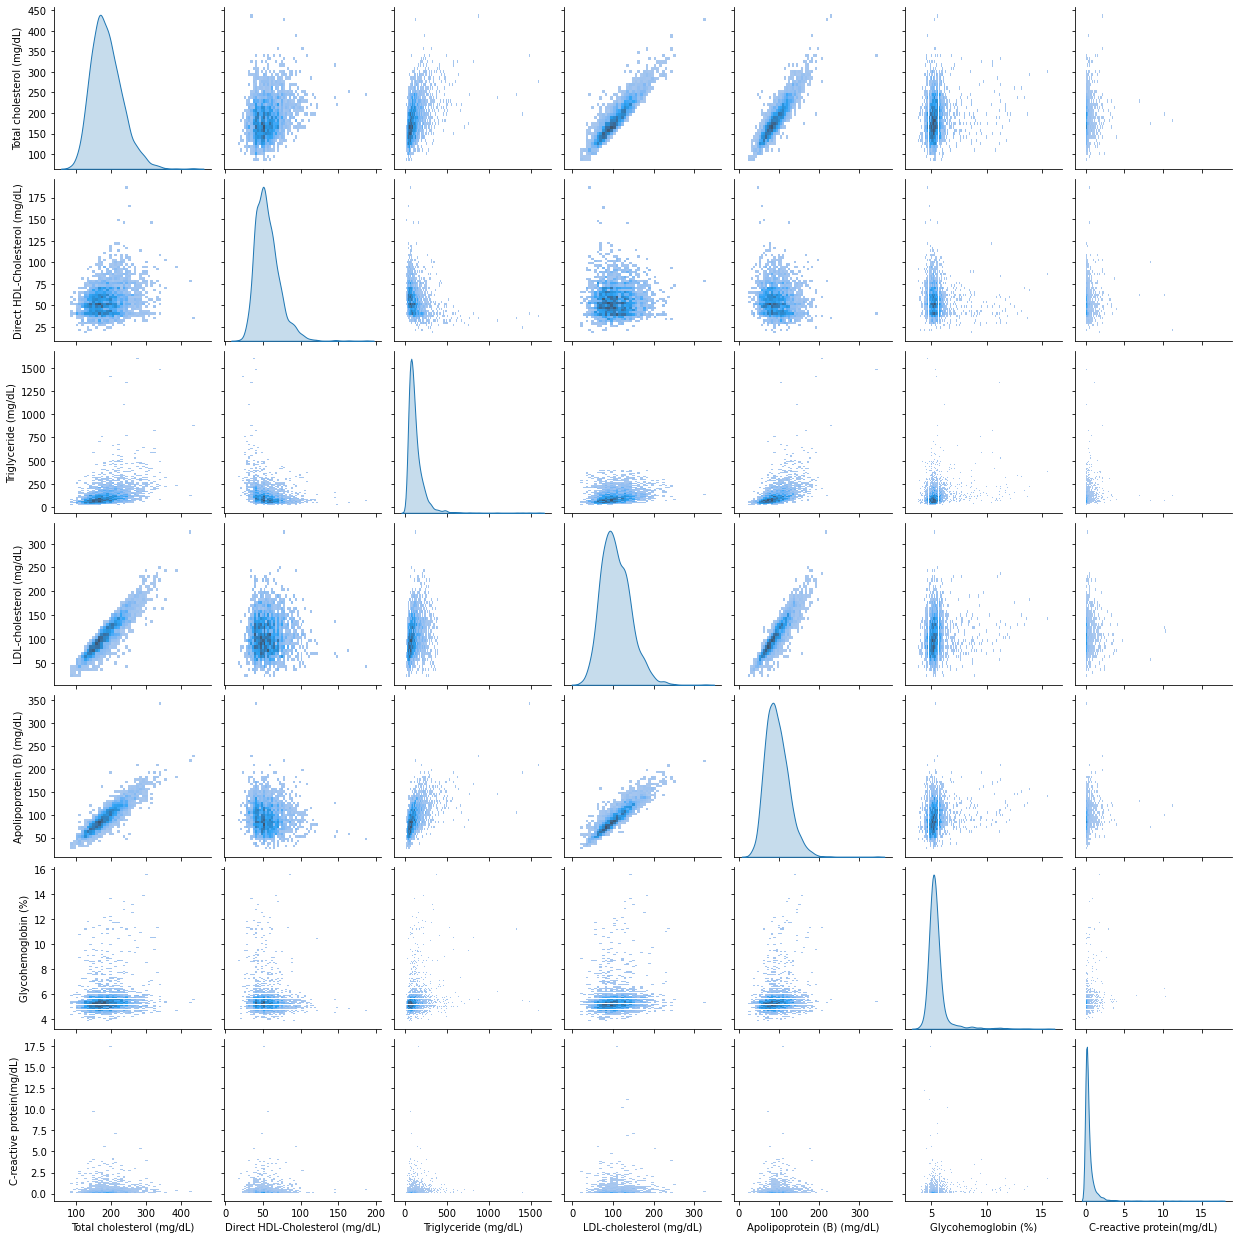

In [53]:
sns.pairplot(exam_df[['Total cholesterol (mg/dL)',
       'Direct HDL-Cholesterol (mg/dL)', 'Triglyceride (mg/dL)',
       'LDL-cholesterol (mg/dL)', 'Apolipoprotein (B) (mg/dL)',
       'Glycohemoglobin (%)', 'C-reactive protein(mg/dL)']], diag_kind='kde', kind='hist')